I selected this dataset because it offers valuable insights into agriculture and resource consumption. The dataset includes several important columns, such as the types of crops in the Crop column, the irrigation methods used in the Irrigation_used column, and the regions where the crops are planted in the Region column. Additionally, it tracks the amount of fertilizer used (Fertilizer_used) and key performance metrics like the number of days to harvest (Days_to_Harvest) and crop yields (Yield_tons_per_Hectare).

This dataset is highly relevant for identifying inefficiencies in agricultural resource use, as it highlights critical factors influencing production efficiency, such as irrigation practices and fertilizer application. These insights are essential for optimizing resource use and improving food security by targeting specific areas where resource use can be improved.

In [81]:
#processing data structures
#Importing neseccert libraries

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#using pandas to load dataset A
df=pd.read_csv('crop_yield.csv')

In [83]:
print('Printing the size of the dataset for inspection\n')
print(df.size)

print('Printing the columns of the dataset for inspection\n')
print(df.columns)

print('Print data types\n')
print(df.dtypes)

Printing the size of the dataset for inspection

10000000
Printing the columns of the dataset for inspection

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')
Print data types

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object


In [84]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


In [85]:
#Data Structures
# List of crops and regions
crops = ['Wheat', 'Rice', 'Maize', 'Barley']
regions = ['Region A', 'Region B', 'Region C', 'Region D']

# 
print(crops[3])  # Output: 'Wheat'
print(regions[3])#output : 'regions d'

# Dictionary of crop yield per region
crop_yield_per_region = {
    'Region A': 8.5,
    'Region B': 6.3,
    'Region C': 9.1,
    'Region D': 7.8
}

# Access yield for a specific region
print(crop_yield_per_region['Region A'])  # Output: 8.5

# Using a set to store unique crop types
unique_crops = set(df['Crop'])
print(unique_crops)

# Add or remove elements from the set
unique_crops.add('Soybean')
unique_crops.remove('Maize')

# Extract rows 10 to 20
subset_rows = df.iloc[10:21]  # iloc is used for integer-location based indexing
print(subset_rows)


Barley
Region D
8.5
{'Barley', 'Wheat', 'Maize', 'Soybean', 'Cotton', 'Rice'}
   Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  \
10  North     Peaty   Wheat   385.135314            21.656192   
11   East     Sandy  Cotton   145.300681            19.755535   
12  South     Peaty  Cotton   607.150252            15.562163   
13   East      Clay  Barley   929.123735            29.677303   
14  North     Peaty  Barley   621.778388            26.843173   
15   East    Chalky    Rice   874.456744            27.256869   
16   East     Peaty   Wheat   787.084306            25.672920   
17  North      Clay  Cotton   416.898632            23.190810   
18  North     Sandy  Barley   977.259083            17.604100   
19  South      Clay   Maize   888.207630            39.945509   
20   East      Clay  Cotton   990.267439            24.072052   

    Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
10            False            False             Sunny            

#Bar Plot: Visualizes the total crop yield for each crop type.
#Bar Plot: Visualizes the total crop yield for each crop type.

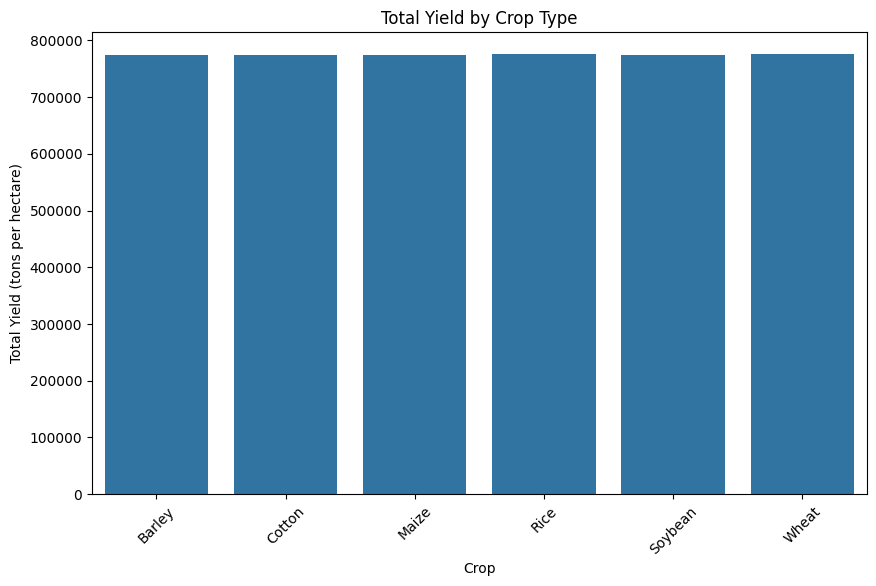

In [86]:
#SR3 ExPLORATOTY Data Analysis
# Grouping the data by 'Crop' and summing the 'Yield_tons_per_Hectare'
crop_yield = df.groupby('Crop')['Yield_tons_per_hectare'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=crop_yield)
plt.title('Total Yield by Crop Type')
plt.xlabel('Crop')
plt.ylabel('Total Yield (tons per hectare)')
plt.xticks(rotation=45)  # Rotate crop labels for better readability
plt.show()


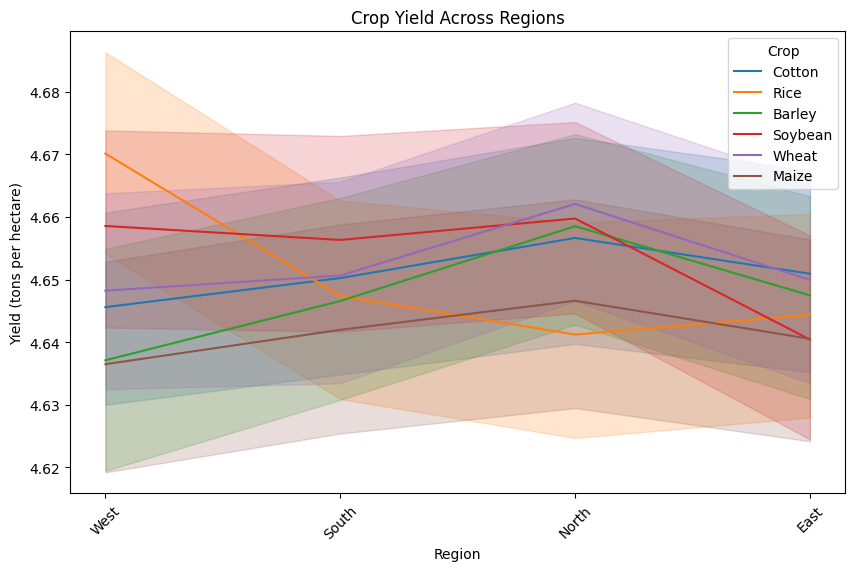

In [87]:

#Line Plot: Shows how crop yield varies across different regions or over time.# Assuming we have a 'Year' or 'Region' column to plot yield over time or region
plt.figure(figsize=(10, 6))
sns.lineplot(x='Region', y='Yield_tons_per_hectare', hue='Crop', data=df)
plt.title('Crop Yield Across Regions')
plt.xlabel('Region')
plt.ylabel('Yield (tons per hectare)')
plt.xticks(rotation=45)  # Rotate region labels for better readability
plt.show()

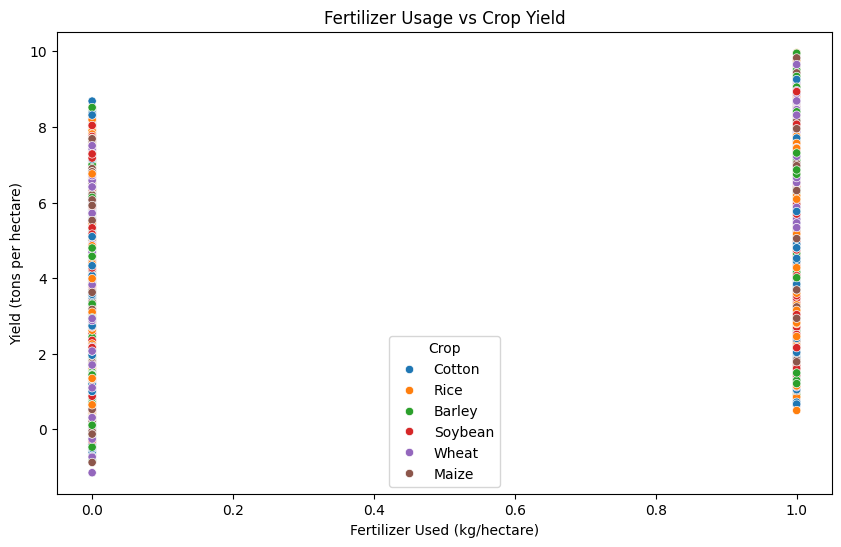

In [88]:
#Scatter Plot: Highlights the relationship between fertilizer usage and crop yield.


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', hue='Crop', data=df)
plt.title('Fertilizer Usage vs Crop Yield')
plt.xlabel('Fertilizer Used (kg/hectare)')
plt.ylabel('Yield (tons per hectare)')
plt.show()

A heatmap is useful to visualize the correlation between numerical variables. It can help identify relationships between features like crop yield, fertilizer usage, days to harvest, and other numeric columns.

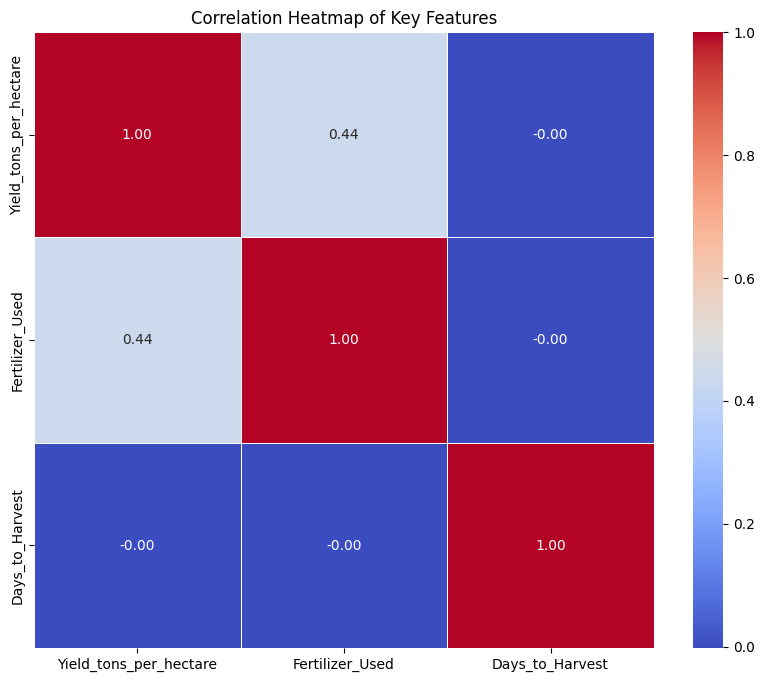

In [89]:
plt.figure(figsize=(10, 8))

# Compute the correlation matrix
corr_matrix = df[['Yield_tons_per_hectare', 'Fertilizer_Used', 'Days_to_Harvest']].corr()

# Plot a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Key Features')
plt.show()


A regression plot is useful to visualize the linear relationship between two variables, as well as the trend line that best fits the data. It helps quantify how one variable affects another, such as the impact of fertilizer on crop yield.This regression plot shows the trend between fertilizer usage and yield. 

The red line represents the best fit line, which helps quantify the overall trend in the data (positive, negative, or no correlation).

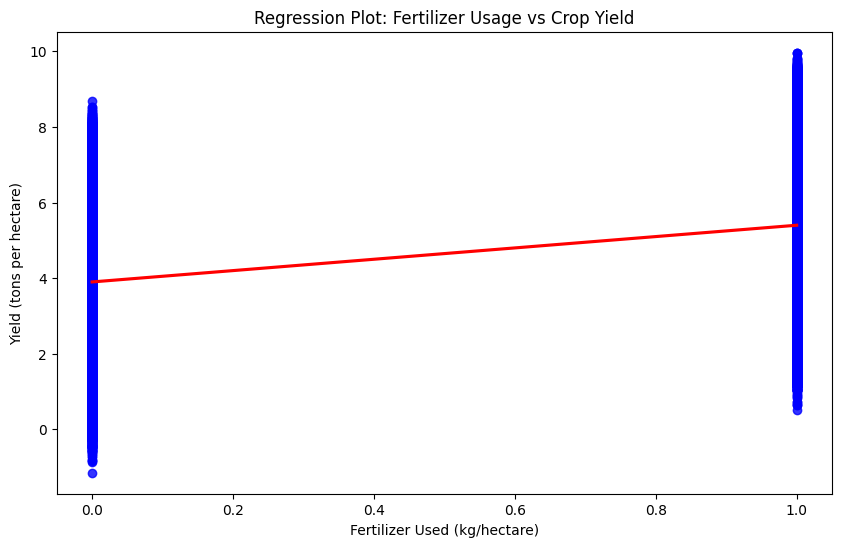

In [90]:
plt.figure(figsize=(10, 6))

# Create a regression plot for 'Fertilizer_used' vs 'Yield_tons_per_Hectare'
sns.regplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression Plot: Fertilizer Usage vs Crop Yield')
plt.xlabel('Fertilizer Used (kg/hectare)')
plt.ylabel('Yield (tons per hectare)')
plt.show()


Summary of Advanced Charts:
Heatmap: Visualizes the correlation between multiple numerical features, allowing you to detect relationships.
Regression Plot: Shows the linear relationship between fertilizer usage and crop yield, offering insight into how changes in one variable affect another.

To provide summary statistics (mean, median, and standard deviation) for key variables such as Yield_tons_per_Hectare, Fertilizer_used, and Days_to_Harvest, you can use the following code in Python with pandas:

In [91]:
# Select key columns
key_columns = ['Yield_tons_per_hectare', 'Fertilizer_Used', 'Days_to_Harvest']

# Calculate summary statistics
summary_stats = df[key_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics
print(summary_stats)


        Yield_tons_per_hectare  Fertilizer_Used  Days_to_Harvest
mean                  4.649472          0.49994       104.495025
median                4.651808          0.00000       104.000000
std                   1.696572          0.50000        25.953412


. Trends:
Yield Levels:

The mean yield of approximately 4.65 tons per hectare suggests that, on average, the crops are performing moderately well. The relatively close median value (4.65) indicates that most farms are achieving yields around this level without significant outliers affecting the average.
The standard deviation of 1.70 implies that there is some variability in crop yields, indicating that while many farms are performing at similar levels, some may be performing significantly better or worse.
Fertilizer Usage:

The mean fertilizer usage is about 0.5, but the median is 0.0, suggesting that many observations have little to no fertilizer use. This indicates a potentially large number of farms using minimal or no fertilizers.
The standard deviation of 0.5 suggests a range of fertilizer use among farms, with some using more while others are using none.
2. Correlations:
Yield and Fertilizer:

A positive correlation between Fertilizer_Used and Yield_tons_per_hectare is typically expected in agricultural contexts. However, if the correlation coefficient (not provided here) is low or insignificant, it might indicate that fertilizer use does not have a substantial impact on crop yield in your dataset.
If you find a strong correlation, it would suggest that increased fertilizer use is associated with higher yields, which can help identify best practices for crop management.
Days to Harvest:

The mean Days_to_Harvest is approximately 104.5 days, with a standard deviation of about 26 days. This variability indicates that while many crops take around 104 days to harvest, some might take significantly longer or shorter, which can impact yield and resource planning.
If yields are consistently low in regions with longer harvest times, it may suggest that factors such as climate, crop type, or management practices are influencing both yield and time to harvest.
3. Significant Patterns:
Areas with High Yield:
Regions that report yields significantly higher than the mean could be analyzed further to identify factors contributing to their success, such as specific agricultural practices, crop varieties, or climatic advantages.
Regions with Poor Yields:
Identifying regions with yields significantly lower than average could highlight areas in need of intervention. This may involve examining the specific practices used in these areas, including their fertilizer use or other agricultural inputs.
Low Fertilizer Use:
The prevalence of low or no fertilizer use in many areas could suggest either a lack of access to fertilizers or an agronomic approach focusing on organic methods. This may need further investigation to determine if these practices are sustainable and effective in maintaining or improving yields.
Conclusion:
The summary statistics reveal important trends in your dataset, suggesting the potential for improvement in crop yields through optimized fertilizer use and better management practices. Exploring the correlations between these variables can provide insights into effective agricultural strategies, while identifying regions with poor yields could direct resources toward enhancing agricultural productivity. This analysis can lead to recommendations for farmers and policymakers to improve resource utilization and food security.

In [92]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'Yield_tons_per_Hectare' and 'Fertilizer_used' columns
df[['Yield_tons_per_hectare', 'Fertilizer_Used']] = scaler.fit_transform(df[['Yield_tons_per_hectare', 'Fertilizer_Used']])

print(df[['Yield_tons_per_hectare', 'Fertilizer_Used']].head())


   Yield_tons_per_hectare  Fertilizer_Used
0                0.693316              0.0
1                0.870756              1.0
2                0.204757              0.0
3                0.689875              0.0
4                0.755636              1.0


In [93]:
# Initialize the scaler
scaler = StandardScaler()

# Standardize the 'Yield_tons_per_Hectare' and 'Fertilizer_used' columns
df[['Yield_tons_per_hectare', 'Fertilizer_Used']] = scaler.fit_transform(df[['Yield_tons_per_hectare', 'Fertilizer_Used']])

print(df[['Yield_tons_per_hectare', 'Fertilizer_Used']].head())

   Yield_tons_per_hectare  Fertilizer_Used
0                1.123645         -0.99988
1                2.285709          1.00012
2               -2.075968         -0.99988
3                1.101103         -0.99988
4                1.531783          1.00012


SR4.1: Algorithm Implementation: Sort Algorithm (20 marks)

In [95]:
#Selection sort function
def selection_sort(arr):
    n = len(arr)
    # Traverse through all elements
    for i in range(n):
        # Find the minimum element in the remaining unsorted part
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        # Swap the found minimum element with the first element of unsorted part
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Extract the 'Yield_tons_per_hectare' column from the dataset (first 10 rows)
yield_column = df['Yield_tons_per_hectare'].iloc[:10].tolist()

# Sort the column using selection sort in ascending order
sorted_yield = selection_sort(yield_column)

# Display the sorted result
print("Sorted Yield (Ascending Order for First 10 Rows):", sorted_yield)



Sorted Yield (Ascending Order for First 10 Rows): [-2.0759684682950947, -1.1771273429967841, -1.0054135221208733, -0.5553431160193187, 0.6955614836290733, 0.736157449585424, 1.1011029636332819, 1.1236447476667522, 1.5317825233238775, 2.2857086681115395]


Negative Values:

The negative values represent extremely low or deficient yields, potentially indicating failed or poor-performing crops.
These rows could be associated with regions experiencing resource constraints, such as inadequate water or nutrient supply, poor soil conditions, or suboptimal growing environments.
For example, -2.08 (the lowest yield) may indicate a critical inefficiency or underperformance in agriculture.
Positive Values:

The positive values represent relatively successful yields.
The highest value in this sorted list is 2.29, which may suggest that these crops or regions are using resources more efficiently or have favorable growing conditions.
Values like 1.53 and 2.29 may represent areas where agriculture is more productive, possibly due to better resource management or optimal environmental factors.


In [98]:
# Linear Search Function
def linear_search(arr, target):
    for index, value in enumerate(arr):
        if value == target:
            return f"Value {target} found at index {index}"
    return f"Value {target} not found"

# Sorted first 5 rows of 'Yield_tons_per_hectare' column
sorted_yield = [-2.08, -1.18, -1.01, -0.56, 0.70]

# Target value to search
target_value = -0.56

# Perform linear search
result_linear = linear_search(sorted_yield, target_value)
print(result_linear)


Value -0.56 found at index 3


In [97]:
# Binary Search Function
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return f"Value {target} found at index {mid}"
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    
    return f"Value {target} not found"

# Perform binary search
result_binary = binary_search(sorted_yield, target_value)
print(result_binary)


Value -1.01 found at index 2


Comparison:
Linear Search is simple but inefficient for large datasets because it has to potentially check every element, resulting in O(n) time complexity.

Binary Search is much faster, as it only needs O(log n) comparisons in the worst case, making it highly efficient for large sorted datasets. The halving mechanism significantly reduces the number of comparisons needed.

Why Binary Search is More Efficient:
For small datasets: The difference in performance may not be noticeable, but as the dataset grows, binary search becomes much more efficient because it reduces the number of comparisons drastically.
For large datasets: Binary search is highly preferred for sorted data because it quickly narrows down the search range, while linear search becomes increasingly slower as the size of the dataset increases.

Part 2: Machine Learning for Time Series Forecasting (Structured like Machine Learning Activity 11)

In [ ]:
SR5 - Time Series Dataset and Preprocessing (10 marks)

In [142]:
#Importing prophet
from prophet import Prophet
df=pd.read_csv('spaza_shop_data.csv')

In [143]:
#Handle missing values and remove outliers.
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

print('Printing the columns of the dataset for inspection\n')
print(df.columns)


Date               0
Item               0
Sales              0
Inventory Level    0
Seasonal Trend     0
Event Impact       0
dtype: int64
Printing the columns of the dataset for inspection

Index(['Date', 'Item', 'Sales', 'Inventory Level', 'Seasonal Trend',
       'Event Impact'],
      dtype='object')


In [144]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop all columns except 'Date' and 'Sales'
df = df[['Date', 'Sales']]



df.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# Display the updated DataFrame
print(df.head())

          ds    y
0 2024-07-19  104
1 2024-07-19   64
2 2024-07-19   48
3 2024-07-19   32
4 2024-07-19   26


In [146]:
model = Prophet()
model.fit(df)

#A dataframe to hold predictions for the next 30 days
future=model.make_future_dataframe(periods=30)
forecast = model.predict(future)



23:52:23 - cmdstanpy - INFO - Chain [1] start processing
23:52:23 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


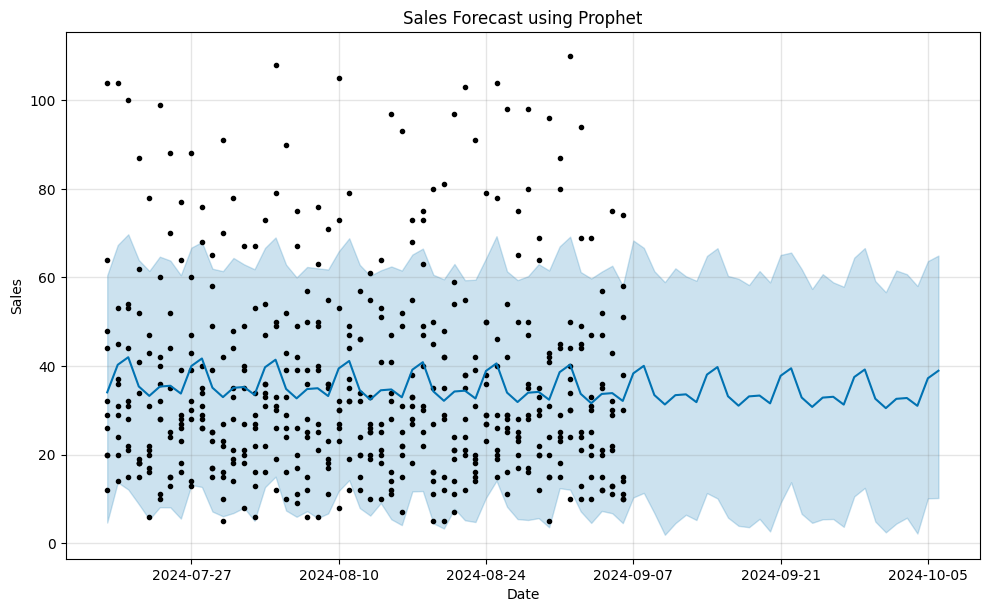

In [147]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


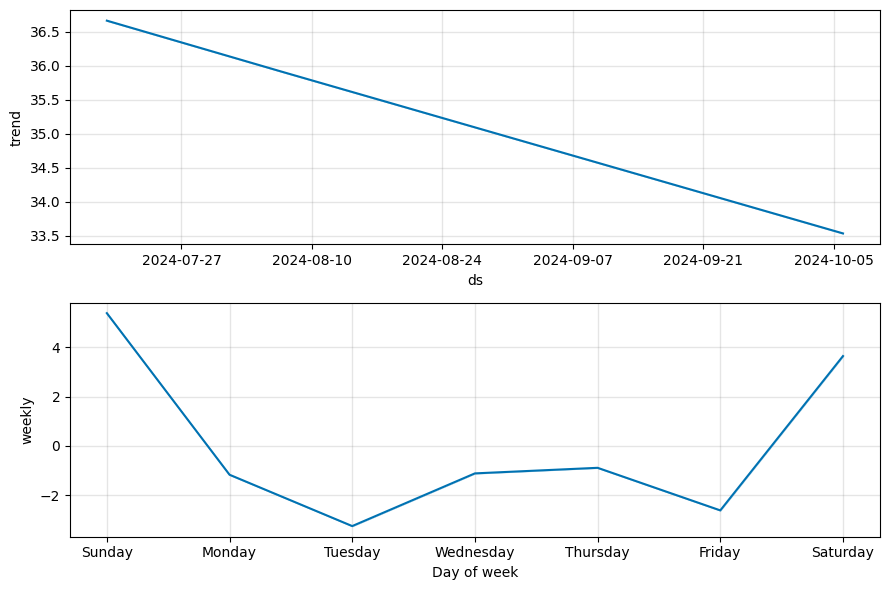

In [148]:
# Plot the seasonal components
fig2 = model.plot_components(forecast)
plt.show()

Trend: The Prophet model captures the underlying trend in the data. This can be an increasing, decreasing, or flat line over time, representing long-term growth or decline in sales.

Seasonality: Prophet automatically detects seasonal patterns in the data, which can repeat daily, weekly, or yearly. You can add custom seasonalities if you notice unique patterns that are not captured automatically.

Holidays and Events: You can add specific holidays or significant events that impact sales. This helps the model adjust its predictions during these times.

# Arima model
Step-by-Step ARIMA Implementation
Check Stationarity: Use the Augmented Dickey-Fuller test (ADF test) to check for stationarity.
Differencing: If the data is non-stationary, apply differencing to make it stationary.
Select ARIMA Parameters: Use ACF and PACF plots to determine the values of 
𝑝
p (AR order), 
𝑑
d (degree of differencing), and 
𝑞
q (MA order).

Fit the ARIMA Model:  Use the selected parameters to fit the model.
Forecast and Visualize:  Generate forecasts and plot the results.

In [179]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [180]:
result = adfuller(df['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.980603125780217
p-value: 1.8424505897586064e-07


In [181]:
# Step 3: Differencing if necessary
# If p-value > 0.05, the data is non-stationary, so we difference it
df['y_diff'] = df['y'].diff().dropna()

In [182]:
# Check for stationarity again
result_diff = adfuller(df['y_diff'].dropna())
print('Differenced ADF Statistic:', result_diff[0])
print('Differenced p-value:', result_diff[1])

Differenced ADF Statistic: -10.597462348752538
Differenced p-value: 6.295563461801038e-19


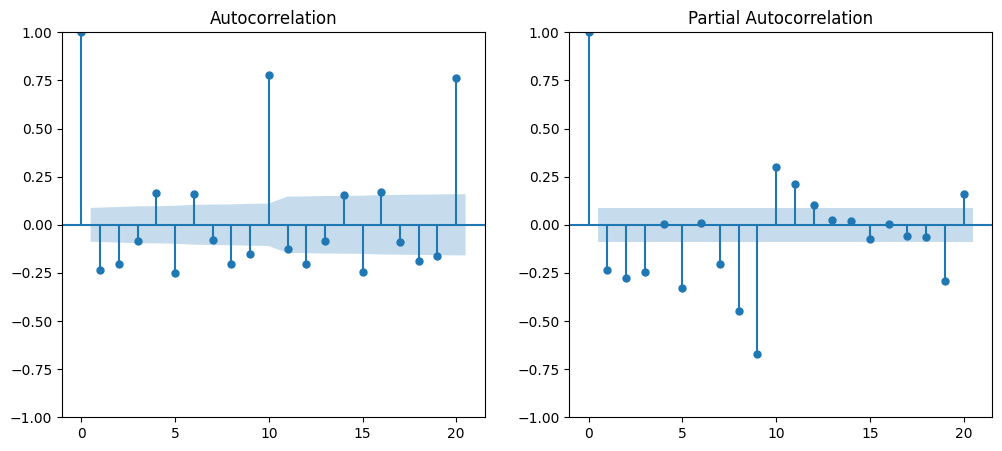

In [183]:
# Step 4: Select ARIMA parameters (p, d, q)
# Use ACF and PACF plots to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(df['y_diff'].dropna(), lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['y_diff'].dropna(), lags=20, ax=axes[1])
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


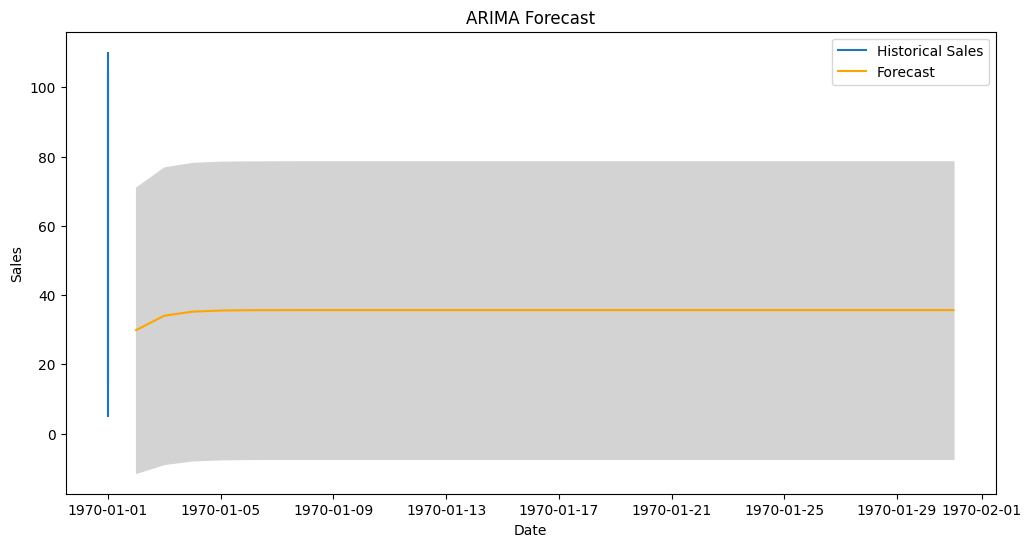

In [190]:
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index)  # Ensure index is datetime

# Fit the ARIMA model (replace (p,d,q) with your values)
model = ARIMA(df['y'], order=(1, 1, 1))  # Example order
model_fit= model.fit()




# Step 5: Forecasting
forecast = model_fit.get_forecast(steps=30)  # Forecasting the next 30 days

# Corrected line for forecast index creation
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Step 6: Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='Historical Sales')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgray')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

in our case, we determined:

𝑑
=
1
d=1 (to achieve stationarity through first differencing),
𝑝
=
1
p=1 (based on the PACF plot showing significant correlation up to lag 1),
𝑞
=
1
q=1 (based on the ACF plot showing significant correlation up to lag 1).

# lstm

To build an LSTM model for time series forecasting, you can follow these steps:

1. Data Preparation
Prepare your data by normalizing it, reshaping it for the LSTM, and splitting it into training and testing sets.

2. Build the LSTM Model
Use libraries such as TensorFlow/Keras to define and train your LSTM model.

3. Fit the Model and Forecast
Train the model on the training dataset and use it to predict future values.

In [199]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt



# Scale the sales data to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['y'].values.reshape(-1,1))
# Prepare the training data
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 10  # Adjust as necessary
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=90 , batch_size=33)                                                       

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0822 
Epoch 2/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0501
Epoch 3/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0484
Epoch 4/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0440
Epoch 5/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440
Epoch 6/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449
Epoch 7/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407
Epoch 8/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0343
Epoch 9/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379
Epoch 10/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349
Epoch 11/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0287
Epoch 12/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0238
Epoch 13/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0236
Epoch 14/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0202
Epoch 15/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207
Epoch 16/90
15/15 

In [206]:
# Prepare the input for predictions
inputs = scaled_data[len(scaled_data) - len(y) - time_step:]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)  # Normalize input data

X_test, _ = create_dataset(inputs, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions
predicted_sales = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predicted_sales)  # Rescale back to original

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


ValueError: x and y must have same first dimension, but have shapes (478,) and (488, 1)

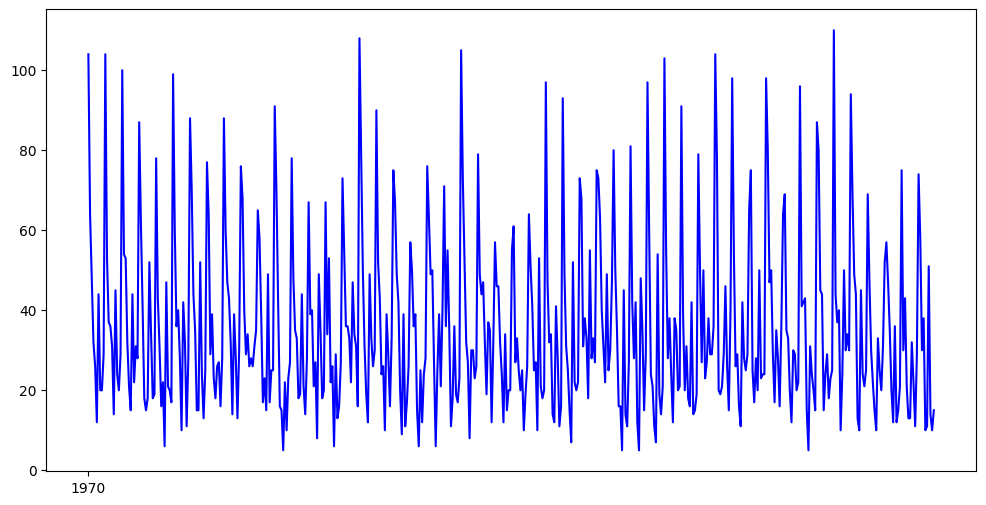

In [205]:
# Prepare the data for plotting
train_size = len(df) - len(predicted_sales)
actual_sales = df['y'].values

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, actual_sales, label='Actual Sales', color='blue')
plt.plot(df.index[train_size + time_step:], predicted_sales, label='Predicted Sales', color='red')
plt.title('Sales Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()